In [7]:
[1,4,6].index(6)

2

In [24]:
category_dir = "imageNetCategory.json"

with open(category_dir, "r") as json_data:
    data = json.load(json_data)
    
for i in range(20):
    print(f"data['children'][{i}] \t"  + data["children"][i]["name"])

data['children'][0] 	menu
data['children'][1] 	carbonara
data['children'][2] 	bubble
data['children'][3] 	pretzel
data['children'][4] 	street sign
data['children'][5] 	toilet tissue, toilet paper, bathroom tissue
data['children'][6] 	French loaf
data['children'][7] 	traffic light, traffic signal, stoplight
data['children'][8] 	bun, roll
data['children'][9] 	sauce
data['children'][10] 	dip
data['children'][11] 	feed, provender
data['children'][12] 	sandwich
data['children'][13] 	foodstuff, food product
data['children'][14] 	nutriment, nourishment, nutrition, sustenance, aliment, alimentation, victuals
data['children'][15] 	geological formation, formation
data['children'][16] 	beverage, drink, drinkable, potable
data['children'][17] 	vegetable, veggie, veg
data['children'][18] 	natural object
data['children'][19] 	artifact, artefact


In [1]:
import json
import random
from glob import glob
from skimage import io, transform
from xml.etree.ElementTree import parse
from torch.utils.data import Dataset, DataLoader




class ImageNetDataloader(Dataset):
    def __init__(self, img_dir, label_dir, category_dir = "imageNetCategory.json", random_rate = 0.0):
        self.label_file = sorted(glob(label_dir +"/*.xml"))
        self.image_file = sorted(glob(img_dir +"/*.JPEG"))
        self.labels = [parse(f).getroot().find("object").findtext("name") for f in self.label_file]
        self.class_num = 0

        self.group = {}
        self.category_name = []        
        self.random_rate = random_rate # 바뀔 확률
        self.id2name = {}
        class_id = 0
        
        with open(category_dir, "r") as json_data:
            data = json.load(json_data)        

        
        oraganism_category = [
            data['children'][0],        #menu
            data['children'][1],        #carbonara
            data['children'][2],        #bubble
            data['children'][3],        #pretzel
            data['children'][4],        #street sign
            data['children'][5],        #toilet tissue, toilet paper, bathroom tissue
            data['children'][6],        #French loaf
            data['children'][7],        #traffic light, traffic signal, stoplight
            data['children'][8],        #bun, roll
            data['children'][9],        #sauce
            data['children'][10],        #dip
            data['children'][11],        #feed, provender
            data['children'][12],        #sandwich
            data['children'][13],        #foodstuff, food product
            data['children'][14],        #nutriment, nourishment, nutrition, sustenance, aliment, alimentation, victuals
            data['children'][15],        #geological formation, formation
            data['children'][16],        #beverage, drink, drinkable, potable
            data['children'][17],        #vegetable, veggie, veg
            data['children'][18],        #natural object
            data['children'][19],        #artifact, artefact            
            data["children"][20]["children"][0], # plant
            data["children"][20]["children"][1], # fungus
            data["children"][20]["children"][2], # person
#             data["children"][20]["children"][3], # animal
            data["children"][20]["children"][3]["children"][0], # invertebrate 갑각류
            data["children"][20]["children"][3]["children"][1], # domestic animal 가축
            data["children"][20]["children"][3]["children"][2], # greyhound 경주용 개
            data["children"][20]["children"][3]["children"][3]["children"][0]["children"][0],#  mamal
            data["children"][20]["children"][3]["children"][3]["children"][0]["children"][1],#  bird
            data["children"][20]["children"][3]["children"][3]["children"][0]["children"][2],#  reptile
            data["children"][20]["children"][3]["children"][3]["children"][0]["children"][3],#  amphibian
            data["children"][20]["children"][3]["children"][3]["children"][0]["children"][4]#  aquatic vertebrate
        ]

        for d in (oraganism_category):
            leafnode = self.get_leafnode(d)
            same_class = [j[2] for j in leafnode]

            self.category_name.append(d['name'])

            for id,name, index in leafnode:
                if id in self.group.keys():
#                     print(name)
                    pass
                else:
                    self.group[id] = {"name": name, "class_id": index, "same_class" : same_class, 
                                      "category_name": d['name']}
                    self.id2name[index] = name
                    class_id+=1      

                
        
#         for i in range(20):
#             leafnode = self.get_leafnode(data["children"][i])
#             same_class = [j[2] for j in leafnode]
#             self.category_name.append(data["children"][i]['name'])

#             for id,name,index in leafnode:
#                 if id in self.group.keys():
# #                     print(name)
#                     pass
#                 else:
#                     self.group[id] = {"name": name, "class_id": index, "same_class" : same_class, 
#                                       "category_name": data["children"][i]['name']}
#                     self.id2name[index] = name
#                     class_id+=1                
                
                
    def __len__(self):
        return len(self.lables)

    
    def __getitem__(self,idx):
        data = self.group[self.labels[idx]] #n****
        
        
        if random.random() <= self.random_rate:
            change_idx = ((data["same_class"].index(data["class_id"])) + random.randrange(0, len(data["same_class"]))) % len(data['same_class'])
            label = data["same_class"][change_idx]
            

#             label = same_class[0] + (((data["category_id"] - same_class[0]) + random.randrange(1,len(same_class)))% len(same_class))
#             print(data["category_name"])
#             print(same_class)
#             print(f"{data['class_id']} --> {label}")
#             print(f"{self.id2name[data['class_id']]} --> {self.id2name[label]}")
            img = io.imread(self.image_file[idx])
            return img, label
        else:
            img = io.imread(self.image_file[idx])
            return img, data["class_id"]
                                     
    def get_leafnode(self, data):
        id = []
        if "children" in data:
            for d in data["children"]:
                id += (self.get_leafnode(d))
            return id
        else:
            return [(data["id"], data["name"], int(data['index']))]


                                 
dataloader = ImageNetDataloader(img_dir = "data/ILSVRC2012_img_val/",  
                                label_dir = "data/ILSVRC2012_bbox_val_v3/val/", random_rate = 0.5)

sea snake --> African chameleon, Chamaeleo chamaeleon
47 African chameleon, Chamaeleo chamaeleon


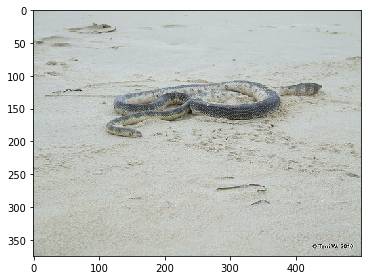

alp --> seashore, coast, seacoast, sea-coast
978 seashore, coast, seacoast, sea-coast


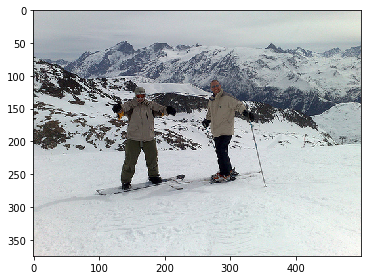

230 Shetland sheepdog, Shetland sheep dog, Shetland


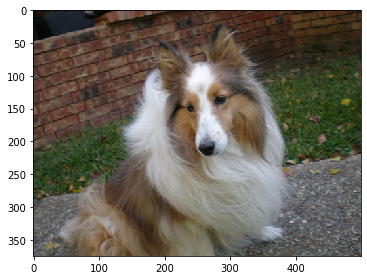

809 soup bowl


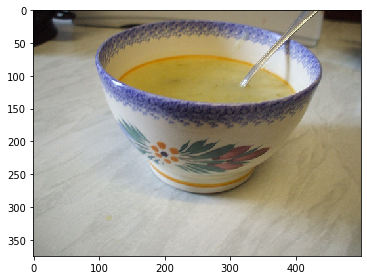

cradle --> carousel, carrousel, merry-go-round, roundabout, whirligig
476 carousel, carrousel, merry-go-round, roundabout, whirligig


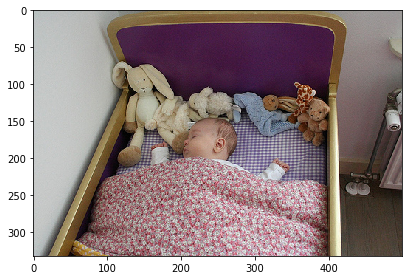

57 garter snake, grass snake


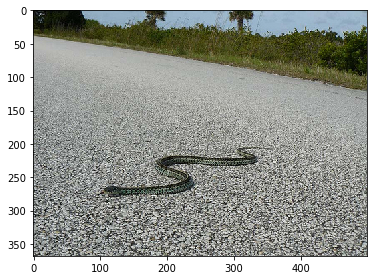

porcupine, hedgehog --> indri, indris, Indri indri, Indri brevicaudatus
384 indri, indris, Indri indri, Indri brevicaudatus


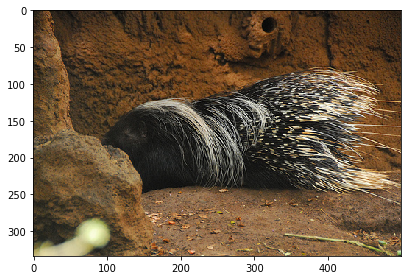

415 bakery, bakeshop, bakehouse


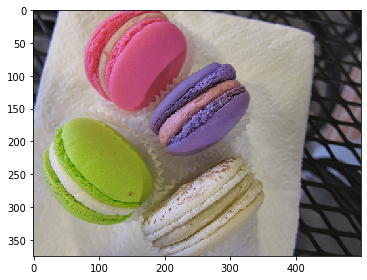

mousetrap --> harvester, reaper
595 harvester, reaper


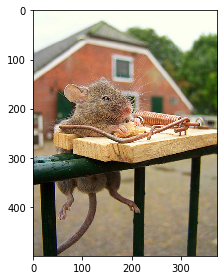

Angora, Angora rabbit --> flat-coated retriever
205 flat-coated retriever


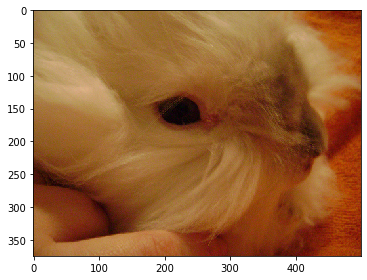

In [2]:
for i in range(10):
    img,label = dataloader[i]
    from matplotlib import pyplot as plt
    # print(dataloader.id2name[label])
    print(label, dataloader.id2name[label])
    io.imshow(img)
    plt.show()

In [118]:
# for i in range(10):
#     dataloader[i]

In [149]:
# dataloader[0]
# print("")

In [87]:
dataloader.id2name[5]

'toilet tissue'

In [100]:
import json

with open("imageNetCategory.json", "r") as json_data:
    data = json.load(json_data)

In [101]:
def get_leafnode(data):
    id = []
    if "children" in data:
        for d in data["children"]:
            id += (get_leafnode(d))
        return id
    else:
        return [(data["id"], data["name"].split(",")[0])]
    


In [113]:
class_num = 0
group_idx = []
group = {}
category_name = []
for i in range(20):
    leafnode = get_leafnode(data["children"][i])
    same_category = [j for j in range(i, i+len(leafnode))]
    category_name.append(data["children"][i]['name'].split(",")[0])
    
    for id,name in leafnode:
        group[id] = {"name": name, "category_id": i, "same_category" : same_category, "category_name": category_name}

        
        

        

In [103]:
oraganism_category = [
data["children"][20]["children"][0], # plant
data["children"][20]["children"][1], # fungus
data["children"][20]["children"][2], # person
data["children"][20]["children"][3], # animal
data["children"][20]["children"][3]["children"][0], # invertebrate 갑각류
data["children"][20]["children"][3]["children"][1], # domestic animal 가축
data["children"][20]["children"][3]["children"][2], # greyhound 경주용 개
data["children"][20]["children"][3]["children"][3]["children"][0]["children"][0],#  mamal
data["children"][20]["children"][3]["children"][3]["children"][0]["children"][1],#  bird
data["children"][20]["children"][3]["children"][3]["children"][0]["children"][2],#  reptile
data["children"][20]["children"][3]["children"][3]["children"][0]["children"][3],#  amphibian
data["children"][20]["children"][3]["children"][3]["children"][0]["children"][4]#  aquatic vertebrate
]
for d in (oraganism_category):
    leafnode = get_leafnode(d)
    same_category = [j for j in range(i, i+len(leafnode))]
    category_name.append(d['name'].split(",")[0])
    
    for id,name in leafnode:
        group[id] = {"name": name, "category_id": i, "same_category" : same_category, "category_name": category_name}

        
        

TypeError: 'set' object does not support item assignment

In [5]:
len(group)

1000

In [200]:
for d in data["children"][20]:
    leafnode = get_leafnode(d[i])
    print(leafnode)
    
    same_category = [j for j in range(i, i+len(leafnode))]

    for id,name in leafnode:
        group[id] = {"name": name, "category_id": i, "same_category" : same_category}

        

IndexError: string index out of range

In [7]:
gt_group = dataloader.label

NameError: name 'dataloader' is not defined

In [6]:
len(group)

1000

In [50]:
group_idx = []

group["n06874185"] = {"name" = "menu", "id" = 0}
group["n07831146"] = {"name" = "carbonara", "id" = 1}
group["n09229709"] = {"name" = "bubble", "id" = 2}
group["n07695742"] = {"name" = "pretzel", "id" = 3}
group["n06794110"] = {"name" = "street sign", "id" = 4}
group["n15075141"] = {"name" = "toilet tissue", "id" = 5}
group["n07684084"] = {"name" = "French loaf", "id" = 6}
group["n06874185"] = {"name" = "traffic light", "id" = 7}





group["n07695742"] = {"name" = "pretzel", "id" = 3}
group["n07695742"] = {"name" = "pretzel", "id" = 3}
group["n07695742"] = {"name" = "pretzel", "id" = 3}
group["n07695742"] = {"name" = "pretzel", "id" = 3}
group["n07695742"] = {"name" = "pretzel", "id" = 3}


SyntaxError: invalid syntax (<ipython-input-50-528464644546>, line 3)

In [38]:
"n07831146" in dataloader.labels

True